# LOGISTIC REGRESSION

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import SplineTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification

# linear models regression
from sklearn.linear_model import SGDClassifier
## metrics regression
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import balanced_accuracy_score


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import PrecisionRecallDisplay

from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score, cross_validate

import warnings
import importlib
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
def ploting_probilities_surfaces(X, y, model, show_data=True,figsize=(10, 8)):
# def ploting_probilities_surfaces(X, y, predict_class, predict_prob, show_data=True):    
    
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))        
    space_to_plot = np.c_[xx.ravel(), yy.ravel()]
    
    Z_temp = np.argmax(model.predict_proba(space_to_plot), axis=1)        
    #Z_temp = predict_class
    Z_predict = Z_temp.reshape(xx.shape)

    Z_prob = model.predict_proba(space_to_plot)
    #Z_prob = predict_prob
    Z_prob = Z_prob[np.arange(Z_temp.shape[0]), Z_temp]
    
    Z_prob = Z_prob.reshape(xx.shape)

    fig = plt.figure()
    plt.figure(figsize=figsize, dpi= 80, facecolor='w', edgecolor='k')
    plt.contourf(xx, yy, Z_predict, cmap=plt.cm.Spectral, alpha=0.8)
    if show_data == True:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    fig = plt.figure()
    plt.figure(figsize=figsize, dpi= 80, facecolor='w', edgecolor='k')
    plt.contourf(xx, yy, Z_prob, cmap=plt.cm.Spectral, alpha=0.8)
    if show_data == True:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    
def compute_metrics_classification(y, y_pred_label, average='binary'):
    acc = accuracy_score(y, y_pred_label)
            
    presicion = precision_score(y, y_pred_label, average=average)
    recall = recall_score(y, y_pred_label, average=average)
    balanced = balanced_accuracy_score(y, y_pred_label)        
    return {'acc':acc, 'presicion':presicion, 'recall':recall, 'balanced':balanced}
    
def compute_curves(y, y_pred_prob, pos_label=1, plot=False):
    precision, recall_tpr_0, thresholds = precision_recall_curve(y, y_pred_prob[:, pos_label], pos_label=pos_label)
    print('precision-recall curve for the class ', pos_label)
    
    fpr, recall_tpr_1, thresholds = roc_curve(y_train, y_pred_prob[:,pos_label], pos_label=pos_label)
    
    if plot:
        fig = plt.figure(figsize=(8, 5))        
        plt.plot(recall_tpr_0, precision)
        
        fig = plt.figure(figsize=(8, 5))        
        plt.plot(fpr, recall_tpr_1)
    
    return {'pr_curve': auc(recall_tpr_0, precision), 'roc_curve':auc(fpr, recall_tpr_1)}
    
def predict_classes(y_prob):
    return np.argmax(y_prob, axis=1), np.max(y_prob, axis=1)    

def compute_presicion_recall_curve_example(y, y_prob, array_threshold):
    df_tmp = pd.DataFrame(np.vstack([y, y_prob]).T)
    df_tmp = df_tmp.sort_values(1)
    
    total_pos = df_tmp[0].sum()
    for thresh in array_threshold:
        df_pos_tmp = df_tmp[df_tmp[1]>=thresh]
        print('threshold: ', thresh)
        print('presicion: ', df_pos_tmp[0].sum()/df_pos_tmp.shape[0])
        print('recall: ', df_pos_tmp[0].sum()/total_pos)
        print()

## 1. Training data for logistic regression

### $$\{\pmb{x_i}, y_i\}_{i=1}^N~~;~\pmb{x_i}\in R^D, y_i = 1, 2,...,K$$

In [11]:
df_train, df_target = make_classification(
    n_samples = 1000,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42,
)

df_train = pd.DataFrame(df_train)
df_train.columns = ['fea_'+str(i) for i in range(df_train.shape[1])]

df_target = pd.DataFrame(df_target)
df_target.columns = ['target']

df_train = df_train.fillna(0.0)
df_target = df_target.fillna(0.0)
print("size, train/test: ", df_train.shape, df_target.shape)

display(df_train.sample(10))
display(df_target.sample(10))

size, train/test:  (1000, 2) (1000, 1)


,fea_0,fea_1
242,-0.834382,0.648280
176,1.764747,-0.626717
709,1.875112,-0.353166
558,0.923982,-0.708407
940,-0.387804,1.899882
109,-0.341667,-0.974529
444,1.286956,-0.650003
188,-1.473249,1.328194
118,-1.580124,-0.669073
451,-0.790335,-0.294950


,target
633,1
443,0
41,0
291,0
580,0
231,1
110,1
755,1
919,1
458,1


# 2. Preprocesamiento:  Feature scaling
* Remover la media~(media=0) 
* Escalar la variance~(var=1)

In [12]:
## Split training and test datasets.
X_train, X_test, Y_train, Y_test = train_test_split(df_train, df_target, test_size=0.1, random_state=0)

## scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index)
X_train_scaled.columns = X_train.columns

X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index)
X_test_scaled.columns = X_test.columns   

X_train_scaled.shape, X_test_scaled.shape

((900, 2), (100, 2))

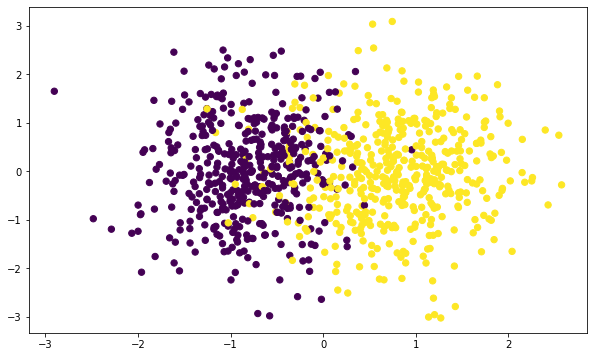

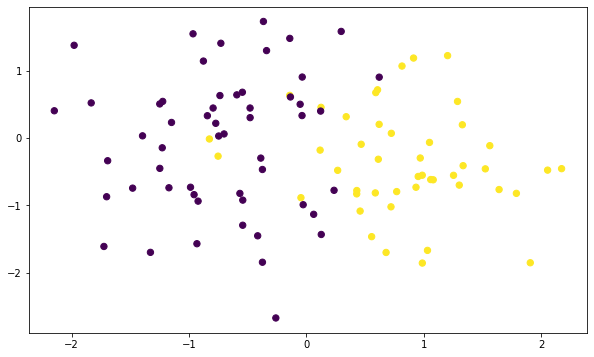

In [13]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled.values[:, 0], X_train_scaled.values[:, 1], c=Y_train.values, s=40)
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled.values[:, 0], X_test_scaled.values[:, 1], c=Y_test.values, s=40)

# 2. Model

## Approximated function: 
## $$f(\pmb{x_i}, \pmb{\theta}) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_Dx_D \in R~;~\pmb{\theta} \in R^{D+1}$$

## $$h(\pmb{x_i}, \pmb{\theta}) = g(f(\pmb{x_i}, \pmb{\theta})) \in [0,1]$$

### **1. Binary  classification**

30
[[ 4.41756694 -0.12537766]]


<Figure size 432x288 with 0 Axes>

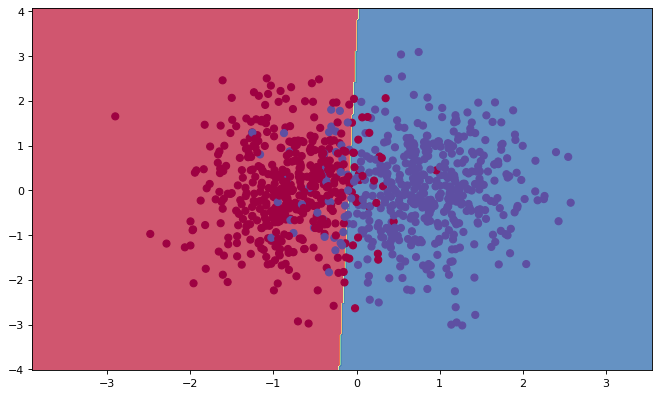

<Figure size 432x288 with 0 Axes>

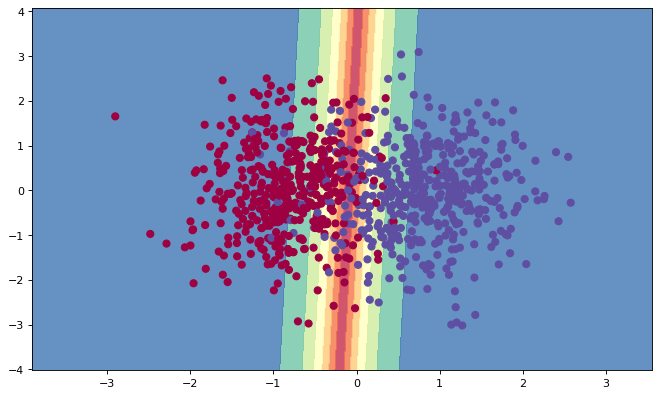

In [7]:
## Default
loss_function = 'log'
learning_rate_method = 'constant'#'invscaling'#'constant'
learning_rate = 0.01

reg_method = 'l2'
alpha = 0.0

shuffle_each_epoch = True

model = SGDClassifier(loss=loss_function, learning_rate=learning_rate_method, eta0=learning_rate, 
                      penalty=reg_method, alpha=alpha, 
                      shuffle=shuffle_each_epoch, 
                      random_state=0, max_iter=1000, tol=1e-10)
model.fit(X_train_scaled, Y_train)

y_train_pred_prob = model.predict_proba(X_train_scaled)
y_test_pred_prob = model.predict_proba(X_test_scaled)

print(model.n_iter_)
print(model.coef_)

ploting_probilities_surfaces(X_train_scaled.values, Y_train.values, model,  figsize=(10, 6))

In [172]:
## compute metrics
dict_metrics_train = compute_metrics_classification(Y_train, predict_classes(y_train_pred_prob)[0])
dict_curves_train = compute_curves(Y_train, y_train_pred_prob, pos_label=1)

dict_metrics_test = compute_metrics_classification(Y_test, predict_classes(y_test_pred_prob)[0])
dict_curves_test = compute_curves(Y_test, y_test_pred_prob, pos_label=1)

df_results_metrics = pd.DataFrame([dict_metrics_train, dict_metrics_test])
df_results_metrics.index = ['metric_train', 'metric_test']

df_results_curves = pd.DataFrame([dict_curves_train, dict_curves_test])
df_results_curves.index = ['curves_train', 'curves_test']
df_results_curves

print(df_results_metrics)
print()
print(df_results_curves)

precision-recall curve for the class  1
precision-recall curve for the class  1
                   acc  presicion    recall  balanced
metric_train  0.911111   0.923937  0.899782  0.911342
metric_test   0.870000   0.811321  0.934783  0.874799

              pr_curve  roc_curve
curves_train  0.975815   0.969958
curves_test   0.966766   0.969958


precision-recall curve for the class  1


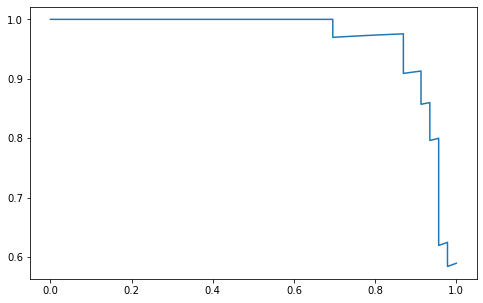

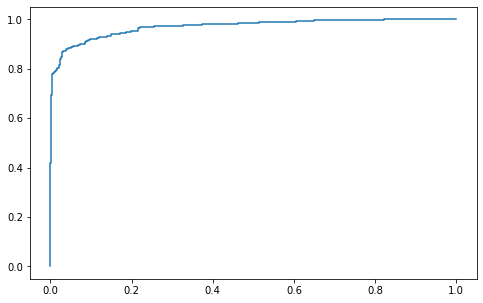

In [169]:
dict_curves_test = compute_curves(Y_test, y_test_pred_prob, pos_label=1, plot=True)

### 2. Multiclass

In [180]:
df_train, df_target = make_classification(
    n_samples = 1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=4,
    n_clusters_per_class=1,
    random_state=42,
)

df_train = pd.DataFrame(df_train)
df_train.columns = ['fea_'+str(i) for i in range(df_train.shape[1])]

df_target = pd.DataFrame(df_target)
df_target.columns = ['target']

# df_train = pd.concat([df_train, df_target], axis=1)
df_train = df_train.fillna(0.0)
df_target = df_target.fillna(0.0)
print("size, train/test: ", df_train.shape, df_target.shape)


# df_train = pd.read_csv(path_data+'train.csv')
# df_test = pd.read_csv(path_data+'test.csv', index_col='Id')

size, train/test:  (1000, 2) (1000, 1)


In [181]:
## Split training and test datasets.
target = 'target'

X_train, X_test, Y_train, Y_test = train_test_split(df_train, df_target, test_size=0.1, random_state=0)

## scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index)
X_train_scaled.columns = X_train.columns

X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index)
X_test_scaled.columns = X_test.columns   

X_train_scaled.shape, X_test_scaled.shape

((900, 2), (100, 2))

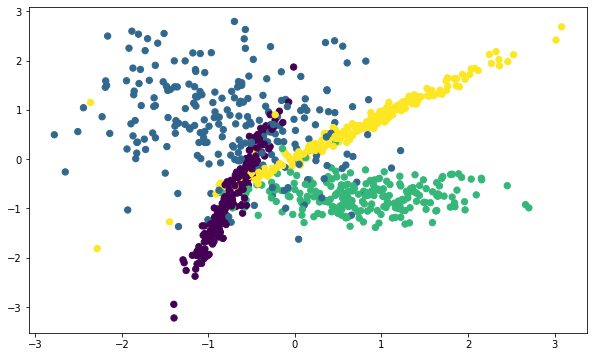

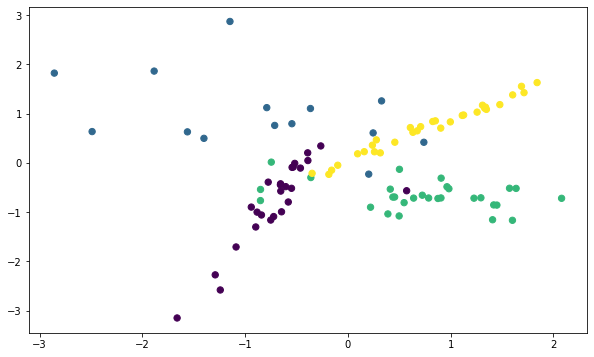

In [182]:
fig = plt.figure(figsize=(10, 6))
# ax, fig = plt.subplots(2, figsize=[8,20])
plt.scatter(X_train_scaled.values[:, 0], X_train_scaled.values[:, 1], c=Y_train.values, s=40)
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled.values[:, 0], X_test_scaled.values[:, 1], c=Y_test.values, s=40)

586
[[-1.57082578 -1.46490215]
 [-2.13626612  2.04789568]
 [ 3.91753506 -3.67999856]
 [ 1.19379463  1.17408767]]


<Figure size 432x288 with 0 Axes>

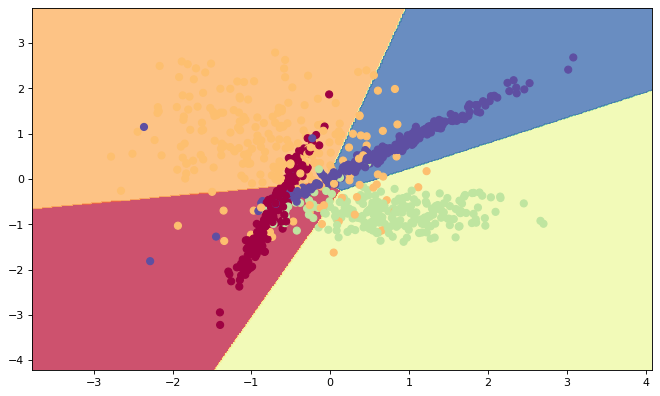

<Figure size 432x288 with 0 Axes>

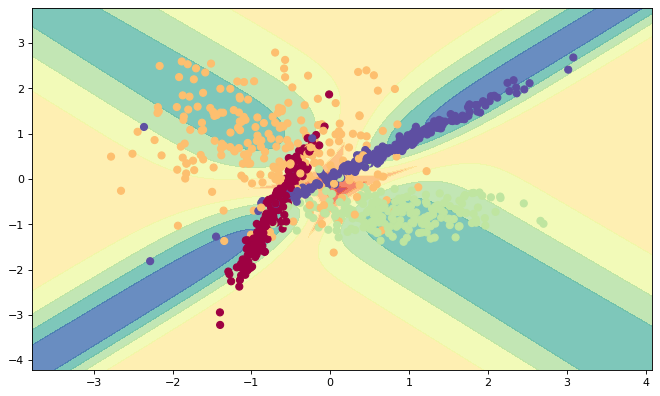

In [184]:
## Default
loss_function = 'log'
learning_rate_method = 'constant'#'invscaling'#'constant'
learning_rate = 0.001

reg_method = 'l2'
alpha = 0.0

shuffle_each_epoch = True

model = SGDClassifier(loss=loss_function, learning_rate=learning_rate_method, eta0=learning_rate, 
                      penalty=reg_method, alpha=alpha, 
                      shuffle=shuffle_each_epoch, 
                      random_state=0, max_iter=1000, tol=1e-10)
model.fit(X_train_scaled, Y_train)

y_train_pred_prob = model.predict_proba(X_train_scaled)
y_test_pred_prob = model.predict_proba(X_test_scaled)

print(model.n_iter_)
print(model.coef_)

ploting_probilities_surfaces(X_train_scaled.values, Y_train.values, model,  figsize=(10, 6))

In [212]:
## compute metrics
dict_metrics_train = compute_metrics_classification(Y_train, predict_classes(y_train_pred_prob)[0], average='macro')
dict_metrics_test = compute_metrics_classification(Y_test, predict_classes(y_test_pred_prob)[0], average='macro')

dict_curves_train = compute_curves(Y_train, y_train_pred_prob, pos_label=0)
dict_curves_test = compute_curves(Y_test, y_test_pred_prob, pos_label=0)

df_results_metrics = pd.DataFrame([dict_metrics_train, dict_metrics_test])
df_results_metrics.index = ['metric_train', 'metric_test']

df_results_curves = pd.DataFrame([dict_curves_train, dict_curves_test])
df_results_curves.index = ['curves_train', 'curves_test']
df_results_curves

print(df_results_metrics)
print()
print(df_results_curves)

precision-recall curve for the class  0
precision-recall curve for the class  0
                   acc  presicion    recall  balanced
metric_train  0.804444   0.812005  0.805201  0.805201
metric_test   0.800000   0.775560  0.784908  0.784908

              pr_curve  roc_curve
curves_train  0.764634   0.903632
curves_test   0.855696   0.903632


In [208]:
dict_metrics_train

{'acc': 0.8044444444444444,
 'presicion': array([0.69262295, 0.74380165, 0.93236715, 0.87922705]),
 'recall': array([0.76126126, 0.76271186, 0.87330317, 0.82352941]),
 'balanced': 0.8052014262133902}

In [ ]:
# ``'binary'``:
#         Only report results for the class specified by ``pos_label``.
#         This is applicable only if targets (``y_{true,pred}``) are binary.
# ``'micro'``:
#     Calculate metrics globally by counting the total true positives,
#     false negatives and false positives.
# ``'macro'``:
#     Calculate metrics for each label, and find their unweighted
#     mean.  This does not take label imbalance into account.
# ``'weighted'``:
#     Calculate metrics for each label, and find their average weighted
#     by support (the number of true instances for each label). This
#     alters 'macro' to account for label imbalance; it can result in an
#     F-score that is not between precision and recall.
# ``'samples'``:
#     Calculate metrics for each instance, and find their average (only
#     meaningful for multilabel classification where this differs from
#     :func:`accuracy_score`)

In [216]:
roc_auc_ovr_train = roc_auc_score(Y_train, y_train_pred_prob, multi_class="ovr", average="macro")
roc_auc_ovr_test = roc_auc_score(Y_test, y_test_pred_prob, multi_class="ovr", average="macro")
roc_auc_ovr_train, roc_auc_ovr_test 

(0.9183449556659838, 0.9321059609369365)

In [106]:
# np.argmax(y_train_pred_prob, axis=1)

In [9]:
report = classification_report(Y_train, predict_classes(y_train_pred_prob)[0])
print(report)
print(accuracy_score(Y_train, predict_classes(y_train_pred_prob)[0]))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       441
           1       0.92      0.90      0.91       459

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900

0.9111111111111111


In [63]:
print(accuracy_score(Y_train, predict_classes(y_train_pred_prob)[0]))
print(precision_score(Y_train, predict_classes(y_train_pred_prob)[0]))
print(recall_score(Y_train, predict_classes(y_train_pred_prob)[0]))
print(balanced_accuracy_score(Y_train, predict_classes(y_train_pred_prob)[0]))

0.9111111111111111
0.9239373601789709
0.8997821350762527
0.9113423147036592


precision-recall curve for the class  1
auc-PR-curve:  0.9758151798981242
average-presicion(AP):  0.9758390083258857


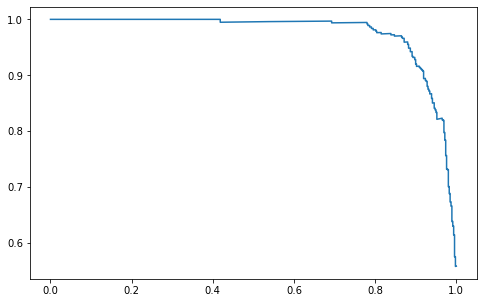

In [130]:
## using one-hot labels
label = 1
enc = OneHotEncoder()
Y_train_onehot = enc.fit_transform(Y_train).toarray()
precision_tpr, recall_fpr, thresholds = precision_recall_curve(Y_train_onehot[:,label], y_train_pred_prob[:,label])

## using sklearn parameter pos_label
# precision_tpr, recall_fpr, thresholds = precision_recall_curve(Y_train, y_train_pred_prob[:,0], pos_label=0)
precision, recall_tpr, thresholds = precision_recall_curve(Y_train, y_train_pred_prob[:,1], pos_label=1)
print('precision-recall curve for the class ', label)
print('auc-PR-curve: ', auc(recall_tpr, precision))
print('average-presicion(AP): ', average_precision_score(Y_train_onehot[:,label], y_train_pred_prob[:,label]))

#compute_presicion_recall_curve_example(Y_train_onehot[:,label], y_train_pred_prob[:,label], thresholds[0:8])    

fig = plt.figure(figsize=(8, 5))
plt.plot(recall_tpr, precision)

In [141]:
# display = PrecisionRecallDisplay.from_estimator(
#     model, X_test, Y_test, name="logistic_regression"
# )
# _ = display.ax_.set_title("2-class Precision-Recall curve")

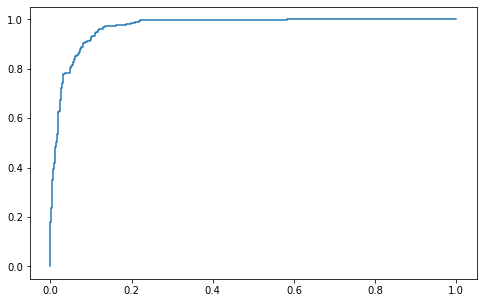

In [140]:
## ROC-curves
fpr, recall_tpr, thresholds = roc_curve(Y_train, y_train_pred_prob[:,0], pos_label=0)
fig = plt.figure(figsize=(8, 5))
plt.plot(fpr, recall_tpr)

In [142]:
auc(fpr, recall_tpr)

0.9699583537118551


# Data partition

1. Partition 1 from original data
    * training 90% --> `X_train`
    * test 10%     --> `X_test` 
2. Partition 2 from `X_train`
    * new training 80% --> `x_train`
    * validation       --> `x_val`

In [34]:
## Split training and test datasets.
target = 'target'

X_train, X_test = train_test_split(df_train[numerical_features_not_null+[target]], test_size=0.1, random_state=0)
Y_train = X_train.pop(target)
Y_test = X_test.pop(target)

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

print('partition 1: ', 'X_train:', X_train.shape, ' X_test:', X_test.shape)
print('partition 2: ', 'X_train:', x_train.shape, ' x_val: ', x_val.shape)

partition 1:  X_train: (900, 3)  X_test: (100, 3)
partition 2:  X_train: (720, 3)  x_val:  (180, 3)


In [35]:
## scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index)
X_train_scaled.columns = X_train.columns

X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index)
X_test_scaled.columns = X_test.columns   

X_train_scaled.shape, X_test_scaled.shape

((900, 3), (100, 3))

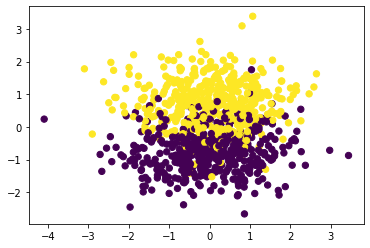

In [36]:
plt.scatter(X_train_scaled.values[:, 0], X_train_scaled.values[:, 1], c=Y_train, s=40)

In [29]:
## Default
loss_function = 'log'
learning_rate_method = 'constant'#'invscaling'#'constant'
learning_rate = 0.01

reg_method = 'l2'
alpha = 0

shuffle_each_epoch = True

model = SGDClassifier(loss=loss_function, learning_rate=learning_rate_method, eta0=learning_rate, 
                      penalty=reg_method, alpha=alpha, 
                      shuffle=shuffle_each_epoch, 
                      random_state=0, max_iter=1000, tol=1e-3)
model.fit(X_train_scaled, Y_train)

y_train_pred_prob = model.predict_proba(X_train_scaled)
y_test_pred_prob = model.predict_proba(X_test_scaled)

print(model.n_iter_)
print(model.coef_)

# plot_results(Y_train, y_train_predict, Y_test, y_test_predict)

14
[[0.14915256 4.419307  ]]


<Figure size 432x288 with 0 Axes>

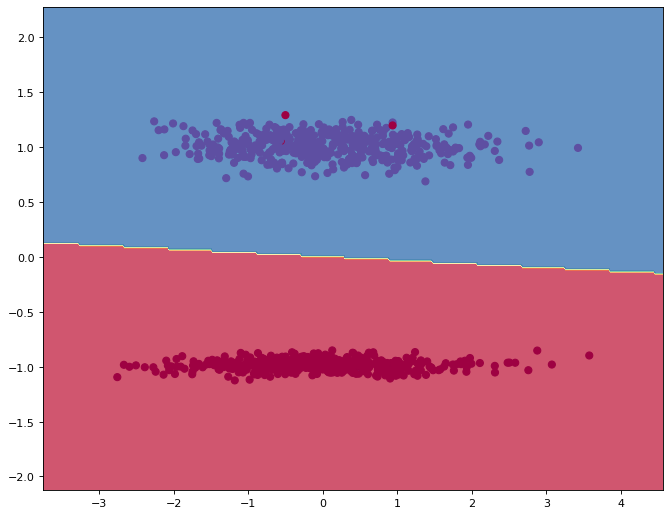

<Figure size 432x288 with 0 Axes>

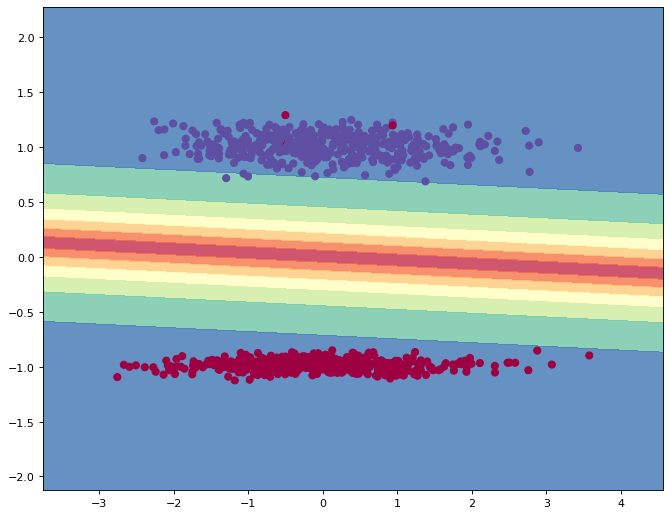

In [30]:
ploting_probilities_surfaces(X_train_scaled.values, Y_train.values, model)
# ploting_probilities_surfaces(X_train_scaled.values, Y_train.values, predict_classes(y_train_pred_prob), 
#                              y_train_pred_prob)

In [11]:
dict_metrics_train = compute_metrics_regression(Y_train, y_train_predict)
dict_metrics_test = compute_metrics_regression(Y_test, y_test_predict)

df_results = pd.DataFrame([dict_metrics_train, dict_metrics_test])
df_results.index = ['train', 'test'] 
df_results

,mse,rmse,mae,mape,msle,rmsle
train,1.181082e+09,34366.871519,21330.234551,0.127436,NaN,NaN
test,1.578204e+09,39726.621462,22056.322115,0.118603,0.028352,0.028352


In [12]:
Y_train[0:10]

Id
931     201000
657     145500
46      319900
1349    215000
56      180500
1229    367294
964     239000
922     145900
459     161000
1387    250000
Name: SalePrice, dtype: int64